# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [2]:
# Load the energy consumption data for Building 5
file_path = r"C:\Users\Ogunsola\Desktop\DS_Analysis\df_new4.csv"
data = pd.read_csv(file_path, parse_dates=['Datetime'])

# Define Tariff Rate and Predict the best plan

The ERSE - Energy Services Regulatory Authority rate was used (https://www.erse.pt/en/activities/market-regulation/tariffs-and-prices-electricity/).
There are 3 tariff plans across different seasons.

Costs for each tariff plan:
Simple: 183183.94 €
Bi-hourly: 191312.54 €
Tri-hourly: 187175.80 €

The best tariff plan is: Simple


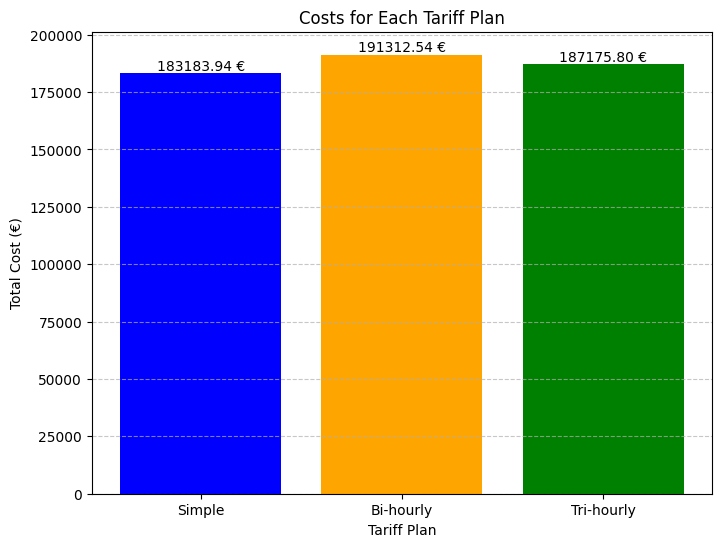

In [7]:
# Define the tariff plans with their respective rates
def get_tariff_rates():
    return {
        "Simple": {
            "rate": 0.1152  # Rate in €/kWh
        },
        "Bi-hourly": {
            "off_peak_rate": 0.0599,
            "peak_rate": 0.1495,
            "off_peak_hours": [(0, 8), (22, 24)],  # Example off-peak hours
        },
        "Tri-hourly": {
            "off_peak_rate": 0.0599,
            "mid_peak_rate": 0.1268,
            "peak_rate": 0.1927,
            "off_peak_hours": [(0, 7), (22, 24)],
            "mid_peak_hours": [(7, 18)],
        }
    }

# Define the cost in respect to each plan
def calculate_costs(data, tariff_rates):
    data['hour'] = data['Datetime'].dt.hour
    
    costs = {
        "Simple": (data['Node_05_Power'] * tariff_rates['Simple']['rate']).sum(),
        "Bi-hourly": 0,
        "Tri-hourly": 0
    }
    
    # Bi-hourly costs
    for _, row in data.iterrows():
        if any(start <= row['hour'] < end for start, end in tariff_rates['Bi-hourly']['off_peak_hours']):
            costs["Bi-hourly"] += row['Node_05_Power'] * tariff_rates['Bi-hourly']['off_peak_rate']
        else:
            costs["Bi-hourly"] += row['Node_05_Power'] * tariff_rates['Bi-hourly']['peak_rate']
    
    # Tri-hourly costs
    for _, row in data.iterrows():
        if any(start <= row['hour'] < end for start, end in tariff_rates['Tri-hourly']['off_peak_hours']):
            costs["Tri-hourly"] += row['Node_05_Power'] * tariff_rates['Tri-hourly']['off_peak_rate']
        elif any(start <= row['hour'] < end for start, end in tariff_rates['Tri-hourly']['mid_peak_hours']):
            costs["Tri-hourly"] += row['Node_05_Power'] * tariff_rates['Tri-hourly']['mid_peak_rate']
        else:
            costs["Tri-hourly"] += row['Node_05_Power'] * tariff_rates['Tri-hourly']['peak_rate']
    
    return costs

# Get the tariff rates
tariff_rates = get_tariff_rates()

# Calculate costs
costs = calculate_costs(data, tariff_rates)

# Predict the best tariff plan
best_plan = min(costs, key=costs.get)

# Display the costs and best plan
print("Costs for each tariff plan:")
for plan, cost in costs.items():
    print(f"{plan}: {cost:.2f} €")

print(f"\nThe best tariff plan is: {best_plan}")

# Plot the costs for each tariff plan
plans = list(costs.keys())
values = list(costs.values())

plt.figure(figsize=(8, 6))
plt.bar(plans, values, color=['blue', 'orange', 'green'])
plt.xlabel('Tariff Plan')
plt.ylabel('Total Cost (€)')
plt.title('Costs for Each Tariff Plan')
plt.ylim(0, max(values) + 10000) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.2f} €", ha='center', va='bottom')

# Save the plot
save_path = r"C:\Users\Ogunsola\Desktop\DS_Analysis\tariff_plan_costs.png"
plt.savefig(save_path)
plt.show()